# Portfolio Optimization using Deep Reinforcement Learning
---

## 5.0 Feature Reduction
---

Autoencoders are used to reduce the number of technical indicators to be represented by only two features

### 5.1 Import Relevant Libraries

In [1]:
pip install finrl

  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-p3v5putk/elegantrl_ae1068805284481a8a46c3f3e396aa2e
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-p3v5putk/elegantrl_ae1068805284481a8a46c3f3e396aa2e
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit b64df20f552477f24ec50c3e5088c1e241fdc455
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [3]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

### 5.2 Load the Data

In [4]:
%store

Stored variables and their in-db values:
df                               ->              date            tic        close     
df_close_full_stocks             ->             date  BRITANNIA.NS  AXISBANK.NS  TATAS
filtered_stocks                  -> Index(['NESTLEIND.NS', 'HDFCBANK.NS', 'HINDUNILVR.


In [5]:
%store -r df

In [6]:
df.head()

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2019-01-09,ASIANPAINT.NS,1414.000000,1397.150024,1402.000000,1402.500000,973687,23.048912,7.896857,5327756272,-4.573096,18.278495,12.349970,1391.958323,1395.415279,99.781902,64.174961,"[[0.00015852269746834745, 1.720325697910041e-0..."
1,2019-01-09,BAJAJ-AUTO.NS,2710.000000,2672.500000,2696.899902,2702.500000,285560,68.528080,9.734268,4727251038,-6.731517,-12.309002,15.475891,2747.995829,2749.349468,-79.336950,41.664892,"[[0.00015852269746834745, 1.720325697910041e-0..."
2,2019-01-09,GRASIM.NS,840.956177,823.226685,831.991821,836.673218,4021049,20.495898,7.643261,2910318411,-8.160890,-5.677552,10.975272,826.057098,829.760860,46.930317,51.833333,"[[0.00015852269746834745, 1.720325697910041e-0..."
3,2019-01-09,HCLTECH.NS,474.274994,466.149994,469.200012,473.500000,2471720,11.073495,4.922655,16292304151,-4.816448,-7.770892,24.752588,478.220833,479.209426,-102.116680,36.874787,"[[0.00015852269746834745, 1.720325697910041e-0..."
4,2019-01-09,HDFCBANK.NS,1060.675049,1051.300049,1058.400024,1059.000000,4284314,14.971774,2.942293,10597644479,-7.130459,6.709806,12.575285,1065.808339,1065.000557,-13.154608,51.853740,"[[0.00015852269746834745, 1.720325697910041e-0..."


In [7]:
# Get the list of all the features
features_list = list(df.columns)[7:-1]

In [8]:
print(features_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


### 5.2 Construct a Data Frame of Features

In [9]:
# construct a data frame of features
features_df = df[features_list]
features_df.index = df['date']

In [10]:
features_df.head()

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2019-01-09,23.048912,7.896857,5327756272,-4.573096,18.278495,12.349970,1391.958323,1395.415279,99.781902,64.174961
2019-01-09,68.528080,9.734268,4727251038,-6.731517,-12.309002,15.475891,2747.995829,2749.349468,-79.336950,41.664892
2019-01-09,20.495898,7.643261,2910318411,-8.160890,-5.677552,10.975272,826.057098,829.760860,46.930317,51.833333
2019-01-09,11.073495,4.922655,16292304151,-4.816448,-7.770892,24.752588,478.220833,479.209426,-102.116680,36.874787
2019-01-09,14.971774,2.942293,10597644479,-7.130459,6.709806,12.575285,1065.808339,1065.000557,-13.154608,51.853740


In [11]:
features_df.shape

(25380, 10)

In [12]:
df.shape

(25380, 18)

### 5.3 Normalize the Features and Construct an Autoencoder

In [13]:
features_array = np.array(features_df)
features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [14]:
features_normalised.shape

(25380, 10)

In [15]:
#import numpy as np  # Import NumPy if not already imported

# Ensure original_size and rows are integers
#original_size = int(features_normalised.size)  # Get total number of elements
#rows = 20

# Calculate required columns (assuming rows = 20)
#required_columns = int(original_size / rows)

# Reshape the array
#eatures_normalised = features_normalised.reshape(-1, rows, required_columns)


In [16]:
# Assuming features_normalised is your original array
#truncated_features = features_normalised[:73880, :]  # Select the first 200 rows
#features_normalised = truncated_features.reshape(-1, 20, 10)


In [17]:
features_normalised = features_normalised.reshape(-1,20, 10)


In [18]:
features_normalised.shape

(1269, 20, 10)

In [19]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade pydot==2.0.0


Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1625
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164
Epoc

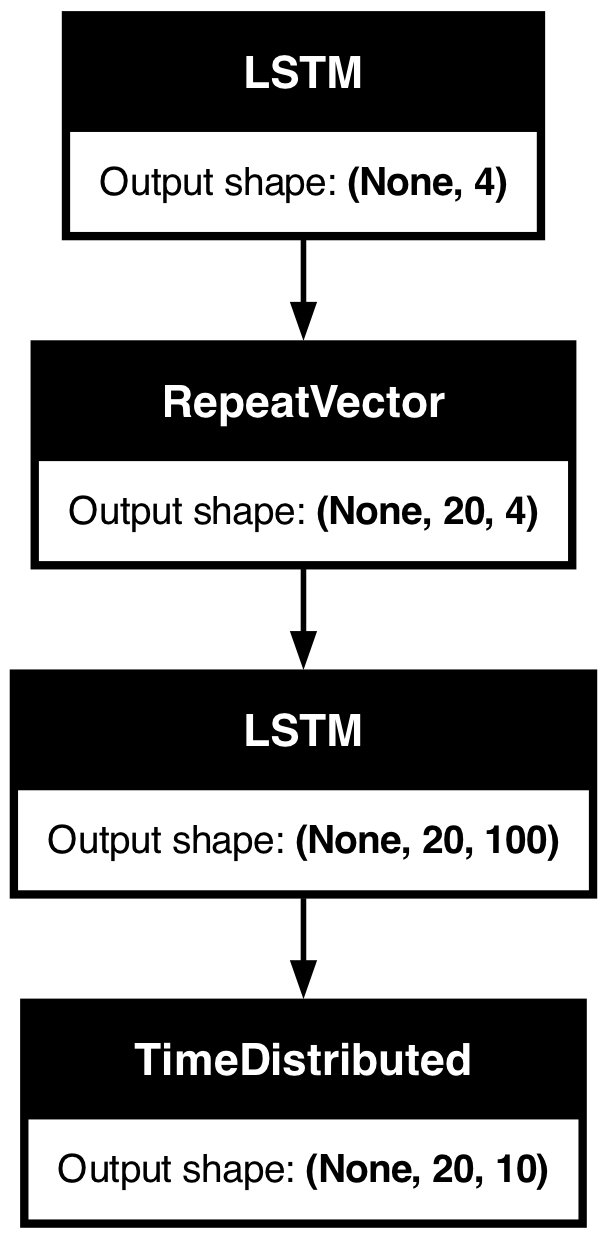

In [22]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)
plot_model(model, show_shapes=True, to_file='./results/reconstruct_lstm_autoencoder.png')

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 10)         │         1,010 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,752 (506.85 KB)

 Trainable params: 43,250 (168.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,502 (337.90 KB)

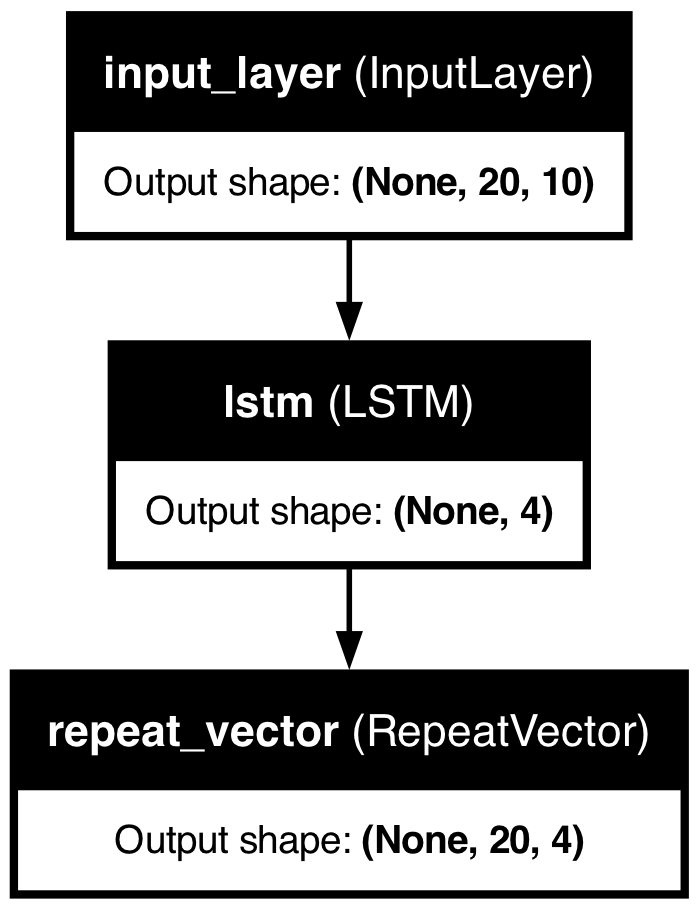

In [24]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)
plot_model(model_feature, show_shapes=True, show_layer_names=True, to_file='./results/lstm_encoder.png')

In [25]:
model_feature.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 4)              │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 4)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240 (960.00 B)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 0 (0.00 B)

### 5.4 Get the Reconstructed Features

In [26]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1269, 20, 4)


In [27]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)

In [28]:
df.shape

(25380, 18)

In [29]:
features_reduced.shape

(25380, 4)

In [30]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(features_list, axis=1)

In [31]:
df_reduced.head()

,date,tic,close,high,low,open,volume,cov_list
0,2019-01-09,ASIANPAINT.NS,1414.000000,1397.150024,1402.000000,1402.500000,973687,"[[0.00015852269746834745, 1.720325697910041e-0..."
1,2019-01-09,BAJAJ-AUTO.NS,2710.000000,2672.500000,2696.899902,2702.500000,285560,"[[0.00015852269746834745, 1.720325697910041e-0..."
2,2019-01-09,GRASIM.NS,840.956177,823.226685,831.991821,836.673218,4021049,"[[0.00015852269746834745, 1.720325697910041e-0..."
3,2019-01-09,HCLTECH.NS,474.274994,466.149994,469.200012,473.500000,2471720,"[[0.00015852269746834745, 1.720325697910041e-0..."
4,2019-01-09,HDFCBANK.NS,1060.675049,1051.300049,1058.400024,1059.000000,4284314,"[[0.00015852269746834745, 1.720325697910041e-0..."


In [32]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])

In [33]:
features_reduced_df.head()

,f01,f02,f03,f04
0,1.47337,0.150646,0.0,4.06108
1,1.47337,0.150646,0.0,4.06108
2,1.47337,0.150646,0.0,4.06108
3,1.47337,0.150646,0.0,4.06108
4,1.47337,0.150646,0.0,4.06108


In [34]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]

In [35]:
df_reduced

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2019-01-09,ASIANPAINT.NS,1414.000000,1397.150024,1402.000000,1402.500000,973687,"[[0.00015852269746834745, 1.720325697910041e-0...",1.473370,0.150646,0.0,4.061080
1,2019-01-09,BAJAJ-AUTO.NS,2710.000000,2672.500000,2696.899902,2702.500000,285560,"[[0.00015852269746834745, 1.720325697910041e-0...",1.473370,0.150646,0.0,4.061080
2,2019-01-09,GRASIM.NS,840.956177,823.226685,831.991821,836.673218,4021049,"[[0.00015852269746834745, 1.720325697910041e-0...",1.473370,0.150646,0.0,4.061080
3,2019-01-09,HCLTECH.NS,474.274994,466.149994,469.200012,473.500000,2471720,"[[0.00015852269746834745, 1.720325697910041e-0...",1.473370,0.150646,0.0,4.061080
4,2019-01-09,HDFCBANK.NS,1060.675049,1051.300049,1058.400024,1059.000000,4284314,"[[0.00015852269746834745, 1.720325697910041e-0...",1.473370,0.150646,0.0,4.061080
...,...,...,...,...,...,...,...,...,...,...,...,...
25375,2024-02-27,RELIANCE.NS,2999.899902,2956.100098,2971.300049,2966.050049,5413022,"[[9.860392541309073e-05, 5.186244935155022e-06...",0.552754,0.006245,0.0,3.889449
25376,2024-02-27,SBILIFE.NS,1569.000000,1538.900024,1542.699951,1553.800049,1764621,"[[9.860392541309073e-05, 5.186244935155022e-06...",0.552754,0.006245,0.0,3.889449
25377,2024-02-27,TCS.NS,4124.000000,3999.000000,4104.399902,3999.000000,2960475,"[[9.860392541309073e-05, 5.186244935155022e-06...",0.552754,0.006245,0.0,3.889449
25378,2024-02-27,TITAN.NS,3675.000000,3621.050049,3653.850098,3630.000000,673959,"[[9.860392541309073e-05, 5.186244935155022e-06...",0.552754,0.006245,0.0,3.889449


In [36]:
data_df = df_reduced.copy()

In [37]:
%store data_df

Stored 'data_df' (DataFrame)


In [38]:
# Check for missing values in the DataFrame after feature reduction
missing_values = df_reduced.isnull().sum()
print("Missing values after feature reduction:\n", missing_values)


Missing values after feature reduction:
 date        0
tic         0
close       0
high        0
low         0
open        0
volume      0
cov_list    0
f01         0
f02         0
f03         0
f04         0
dtype: int64


In [39]:
# Summary statistics of original features
original_features_summary = features_df.describe()

# Summary statistics of reduced features
reduced_features_summary = features_reduced_df.describe()

print("Summary statistics of original features:\n", original_features_summary)
print("\nSummary statistics of reduced features:\n", reduced_features_summary)


Summary statistics of original features:
                 atr           bbw           obv           cmf          macd  \
count  25380.000000  25380.000000  2.538000e+04  25380.000000  25380.000000   
mean      40.728125     10.565376  8.275437e+09     -5.878599      7.338277   
std       44.716546      6.404101  4.650899e+09      1.862131     43.390879   
min        1.607911      1.215147  2.669636e+08    -23.276510   -557.631883   
25%       14.002198      6.437329  4.492651e+09     -6.904780     -6.206793   
50%       30.144973      8.957513  7.170317e+09     -5.592101      3.031188   
75%       49.202032     12.839286  1.297182e+10     -4.545536     18.928348   
max      547.209021     69.707369  1.697255e+10     -2.035249    352.092104   

                adx           sma           ema           cci           rsi  
count  25380.000000  25380.000000  25380.000000  25380.000000  25380.000000  
mean      22.005605   1771.282388   1771.374635     17.419194     53.094757  
std        8

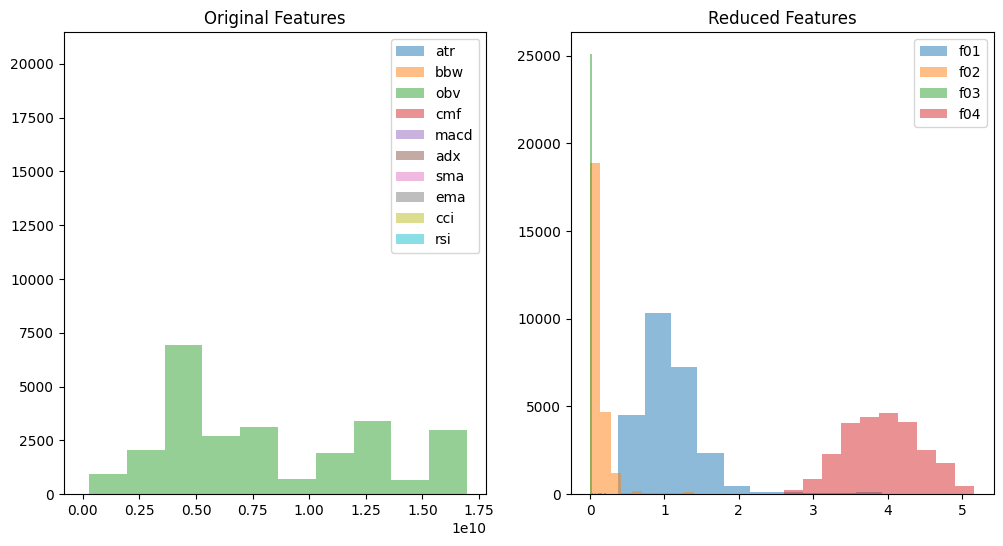

In [40]:
import matplotlib.pyplot as plt

# Visualize original and reduced features
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original features
for i, feature in enumerate(features_list):
    axs[0].hist(features_df[feature], alpha=0.5, label=feature)
axs[0].set_title('Original Features')
axs[0].legend()

# Plot reduced features
for i, column in enumerate(features_reduced_df.columns):
    axs[1].hist(features_reduced_df[column], alpha=0.5, label=column)
axs[1].set_title('Reduced Features')
axs[1].legend()

plt.show()
